# ATENÇÃO! 

Este é o notebook de rascunho com uma tentativa de clusterização da base de clientes da ollist, organizadana no outro notebook "organizando_dataset_olist.ipynb". 

O problema era complexo demais para ser abordado na aula, mas vale a averiguação com calma do que pode ser feito. 

Fica ai o desafio! ;)

# Aula 6 - Aprendizagem não-supervisionada e K-MEANS

Por onde vamos passar? 

- 1) Aprendizagem não-supervisionada? Onde vive? O que come?;
- 2) Utilizando um exemplo com K-means;
- 3) Afinal, o que o K-means está fazendo?;
- 4) Agora que sabemos, vamos resolver um problema real.

# Agora, vamos atacar um problema real

In [132]:
olist = pd.read_csv("dataset_olist/olist_dataset_aula.csv")
olist.shape

(117604, 22)

In [133]:
olist.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,...,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,...,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,...,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,...,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,...,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


In [134]:
dt = olist.iloc[:5000, :]

In [135]:
dt.isnull().sum()

order_id                           0
order_item_id                      0
product_id                         0
seller_id                          0
shipping_limit_date                0
price                              0
freight_value                      0
payment_sequential                 0
payment_type                       0
payment_installments               0
payment_value                      0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date      46
order_delivered_customer_date    101
order_estimated_delivery_date      0
customer_unique_id                 0
customer_zip_code_prefix           0
customer_city                      0
customer_state                     0
dtype: int64

In [136]:
dt["order_purchase_timestamp"].min()

'2016-10-04 09:06:10'

In [137]:
dt["order_purchase_timestamp"].max()

'2018-08-29 14:52:00'

In [138]:
dt.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state'],
      dtype='object')

In [139]:
dt["order_purchase_timestamp"] = pd.to_datetime(dt["order_purchase_timestamp"])

C:\Users\r-omd\AppData\Local\Temp\ipykernel_72060\3039592857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt["order_purchase_timestamp"] = pd.to_datetime(dt["order_purchase_timestamp"])


In [140]:
dt_cluster = dt.groupby(["customer_id"], as_index = False)[["price", "order_purchase_timestamp"]].agg({"price":["mean","size"],
                                                                                                       "order_purchase_timestamp": "max"})

In [141]:
dt_cluster.head()

customer_id   price      order_purchase_timestamp
                                       mean size                      max
0  000379cdec625522490c315e70c7a9fb   93.00    1      2018-04-02 13:42:17
1  000419c5494106c306a97b5635748086   34.30    1      2018-03-02 17:47:40
2  0009a69b72033b2d0ec8c69fc70ef768  159.90    1      2017-04-28 13:36:30
3  002b24cb2cd0c3e575040dbd278885e3   24.99    1      2018-05-21 23:17:32
4  004a2b3e8b026284407c620f4f01f686  138.00    1      2018-04-18 22:19:28

In [142]:
dt_cluster.columns = ["customer_id", "preco_medio", "quantidade", "ultima_compra"]

In [143]:
dt_cluster.head()

,customer_id,preco_medio,quantidade,ultima_compra
0,000379cdec625522490c315e70c7a9fb,93.00,1,2018-04-02 13:42:17
1,000419c5494106c306a97b5635748086,34.30,1,2018-03-02 17:47:40
2,0009a69b72033b2d0ec8c69fc70ef768,159.90,1,2017-04-28 13:36:30
3,002b24cb2cd0c3e575040dbd278885e3,24.99,1,2018-05-21 23:17:32
4,004a2b3e8b026284407c620f4f01f686,138.00,1,2018-04-18 22:19:28


In [144]:
import datetime
pd.to_datetime(datetime.date.today())

Timestamp('2022-06-06 00:00:00')

In [145]:
dt_cluster["recencia"] = (pd.to_datetime(datetime.date.today()) - dt_cluster["ultima_compra"]).dt.days

In [146]:
dt_cluster.sort_values("recencia")

,customer_id,preco_medio,quantidade,ultima_compra,recencia
1253,496630b6740bcca28fce9ba50d8a26ef,24.90,1,2018-08-29 14:52:00,1376
498,1c3d8766b5f8b24d7e95001ce31d1d38,7.50,1,2018-08-28 18:49:20,1377
204,0b5f6687d659478f1747caed607c4ec5,59.90,1,2018-08-28 21:10:46,1377
646,25308e9c16af1a99ce8c88b431f0bca5,21.99,1,2018-08-27 15:04:59,1378
3358,c713fee6f70301b6bf60701902502703,85.00,1,2018-08-27 18:45:54,1378
...,...,...,...,...,...
2532,98661b627038780e9e655a56ebc23dc6,128.90,1,2016-10-07 02:41:42,2067
1356,51cc1e38d0489d588d7a687da73b2458,249.90,2,2016-10-06 10:47:15,2068
3887,e937151346d1bec664f5b80cd798bdd2,649.00,1,2016-10-05 15:17:57,2069
1324,4f3f778022aefa22b9f9e52d2c47edf3,49.99,1,2016-10-04 09:06:10,2070


In [156]:
from sklearn.preprocessing import StandardScaler

In [157]:
scaler = StandardScaler()

X = scaler.fit_transform(dt_cluster[["preco_medio", "quantidade","recencia"]])

In [158]:
lista_inercias = []
lista_silhueta = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    inercia = kmeans.inertia_
    labels = kmeans.labels_
    silhueta = silhouette_score(X, labels)
    lista_inercias.append(inercia)
    lista_silhueta.append(silhueta)

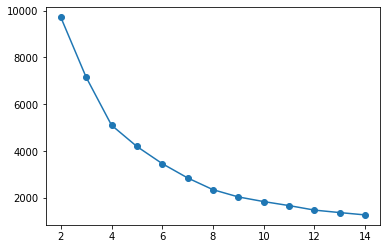

In [159]:
plt.plot(range(2,15), lista_inercias, marker = "o")

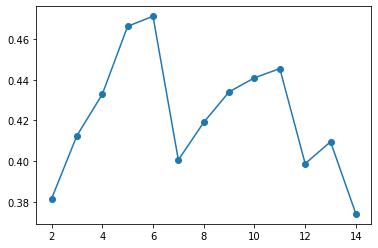

In [160]:
plt.plot(range(2,15), lista_silhueta, marker = "o")

In [162]:
kmeans = KMeans(n_clusters = 6)
kmeans.fit(X)
dt_cluster["labels"] = kmeans.labels_

In [164]:
dt_cluster.head()

,customer_id,preco_medio,quantidade,ultima_compra,recencia,labels
0,000379cdec625522490c315e70c7a9fb,93.00,1,2018-04-02 13:42:17,1525,1
1,000419c5494106c306a97b5635748086,34.30,1,2018-03-02 17:47:40,1556,1
2,0009a69b72033b2d0ec8c69fc70ef768,159.90,1,2017-04-28 13:36:30,1864,0
3,002b24cb2cd0c3e575040dbd278885e3,24.99,1,2018-05-21 23:17:32,1476,1
4,004a2b3e8b026284407c620f4f01f686,138.00,1,2018-04-18 22:19:28,1509,1


In [167]:
dt_norm = pd.DataFrame(X, columns = ["preco_medio_n", "quantidade_n", "recencia_n"])
dt_norm["labels"] = kmeans.labels_

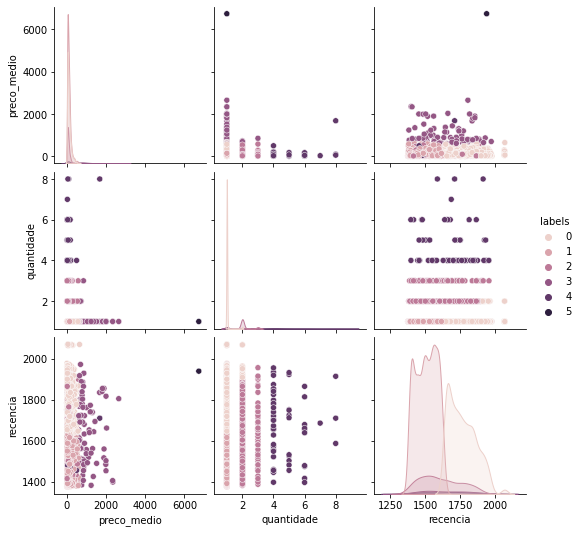

In [172]:
sns.pairplot(dt_cluster, hue = "labels")